# Audio Signals in Python
### Wellesley College Physics Department

After completing this tutorial, you will:
* generate and play audio signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# to play audio
import sounddevice as sd

# the next line allows plots to be displayed within a Jupyter notebook
# the command, preceded by a % sign, is known as a "magic" command
# and comments on the same line aren't allowed
%matplotlib inline

Make a waveform (pure-tone).  Plot it, and play it.

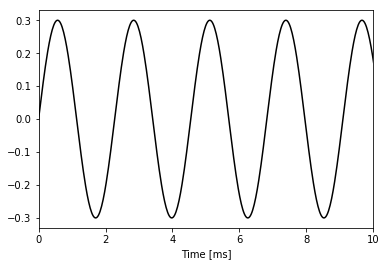

In [3]:
dur = 1.5  # duration in seconds
amp = 0.3  # amplitude (full scale: +-1.0)
freq = 440.  # frequency in Hertz
fs = 44100  # sampling frequency in Hertz  44.1kHz is a common sampling freq for digital audio

tt  = np.arange(np.ceil(dur * fs)) / fs   # time samples
sig = amp * np.sin(2 * np.pi * freq * tt) # amplitudes

plt.plot(tt*1000, sig, 'k-');
plt.xlabel("Time [ms]")
plt.xlim(0,10);

Now, play the audio through the computer speakers

In [4]:
sd.play(sig, fs)

Let's define a function that can produce a pure-tone signal

In [13]:
import audioTools as at

def myplay(data, fs=44100):
    """Apply fade in/out and play with 44.1 kHz."""
    fadeInSamples = 2000
    fadeOutSamples = 5000
    data = at.fade(data, fadeInSamples, fadeOutSamples)
    sd.play(data, fs)
    

def mysine(frequency, amplitude, duration, samplerate=44100):
    """Generate sine tone with the given parameters @ 44.1 kHz."""
    fs  = samplerate
    tt  = np.arange(np.ceil(duration * fs)) / fs   # time samples
    sig = amplitude * np.sin(2 * np.pi * frequency * tt) # amplitudes

    return sig
    

In [23]:
f0 = 440
s1 = mysine(f0, 0.3, 2)
s2 = mysine(f0*2, 0.3, 2)
s3 = mysine(f0*3, 0.3, 2)
s4 = mysine(f0*4, 0.3, 2)
s5 = mysine(f0*5, 0.3, 2)

ss = s1+s2+s3+s4+s5
sm = s3+s4+s5
myplay(ss)
